In [1]:
import os
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [5]:
# problem set up
n = 2000
#s = int(0.1*n)
noiseamp = 0.001 # noise amplitude
decay_factor=0.5
#obj_func = SparseQuadric(n, s, noiseamp)
obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)

# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
xx0   = copy.deepcopy(x0)

#sparsity = s
sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":1.0, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [6]:
#IHT set up 
threshold_IHT=2
step_IHT=0.0000001
itt_IHT=30 
C_IHT=0.3 # threshold update
lamda_IHT=3 # threshold param 

In [7]:
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6))
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6))
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6))
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity)
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=2*sparsity,itt_IHT=itt_IHT)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)

# the actual optimization routine
termination=False

In [8]:
performance_log_ZORO_IHT=opt_IHT.Zoro()

Estimated f(x_k): 8.545197  function evals: 3042
Estimated f(x_k): 8.544715  function evals: 6084
Estimated f(x_k): 8.544385  function evals: 9126
Estimated f(x_k): 8.544203  function evals: 12168
Estimated f(x_k): 8.544172  function evals: 15210
Estimated f(x_k): 8.544289  function evals: 18252
Estimated f(x_k): 8.544558  function evals: 21294
Estimated f(x_k): 8.544974  function evals: 24336
Estimated f(x_k): 8.545542  function evals: 27378
Estimated f(x_k): 8.546258  function evals: 30420
Estimated f(x_k): 8.547126  function evals: 33462
Estimated f(x_k): 8.548141  function evals: 36504
Estimated f(x_k): 8.549307  function evals: 39546
Estimated f(x_k): 8.550624  function evals: 42588
Estimated f(x_k): 8.552090  function evals: 45630
Estimated f(x_k): 8.553704  function evals: 48672
Estimated f(x_k): 8.555470  function evals: 51714
Estimated f(x_k): 8.557384  function evals: 54756
Estimated f(x_k): 8.559450  function evals: 57798
Estimated f(x_k): 8.561663  function evals: 60840
Est

KeyboardInterrupt: 

In [9]:
performance_log_ZORO_Co=opt_Co.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()
#performance_log_ZORO_Lasso=opt_Lasso.Zoro()
#performance_log_ZORO_DLasso=opt_DLasso.Zoro()

Estimated f(x_k): 8.545197  function evals: 3042
Estimated f(x_k): 3.629171  function evals: 6084
Estimated f(x_k): 2.873743  function evals: 9126
Estimated f(x_k): 2.574719  function evals: 12168
Estimated f(x_k): 2.328659  function evals: 15210
Estimated f(x_k): 2.123038  function evals: 18252
Estimated f(x_k): 1.965377  function evals: 21294
Estimated f(x_k): 1.843162  function evals: 24336
Estimated f(x_k): 1.716716  function evals: 27378
Estimated f(x_k): 1.593089  function evals: 30420
Estimated f(x_k): 1.489942  function evals: 33462
Estimated f(x_k): 1.405707  function evals: 36504
Estimated f(x_k): 1.331910  function evals: 39546
Estimated f(x_k): 1.247503  function evals: 42588
Estimated f(x_k): 1.158508  function evals: 45630
Estimated f(x_k): 1.100398  function evals: 48672
Estimated f(x_k): 1.013127  function evals: 51714
Estimated f(x_k): 0.949676  function evals: 54756
Estimated f(x_k): 0.853309  function evals: 57798
Estimated f(x_k): 0.795714  function evals: 60840
Est

KeyboardInterrupt: 

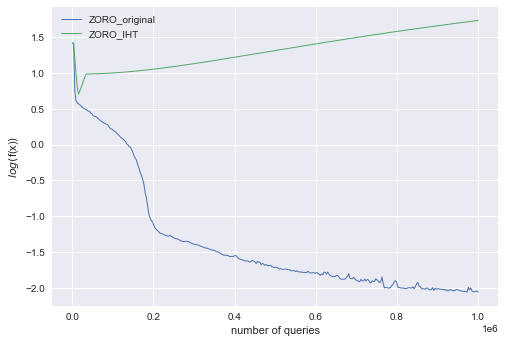

In [11]:
fig, ax = plt.subplots()
ax.plot(np.array(performance_log_ZORO_Co)[:,0],
 np.log10(np.array(performance_log_ZORO_Co)[:,1]), linewidth=1, label = "ZORO_original")
ax.plot(np.array(performance_log_ZORO_IHT)[:,0],
 np.log10(np.array(performance_log_ZORO_IHT)[:,1]), linewidth=1, label = "ZORO_IHT")
#ax.plot(np.array(performance_log_ZORO_Lasso)[:,0],
 #np.log10(np.array(performance_log_ZORO_Lasso)[:,1]), linewidth=1, label = "ZORO_Lasso")
#ax.plot(np.array(performance_log_ZORO_DLasso)[:,0],
 #np.log10(np.array(performance_log_ZORO_DLasso)[:,1]), linewidth=1, label = "ZORO_DLasso")
plt.xlabel('number of queries')
plt.ylabel('$log($f(x)$)$')
leg = ax.legend()
plt.show()